In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset from path
#Pandas is used for loading CSV files
import pandas as pd
path = '/content/drive/MyDrive/Random forest SVM Decision trees/data.txt'
df = pd.read_csv(path,sep=',')
df.columns = ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','target_class']
df.head()

In [ ]:
#train test splitting
from sklearn.model_selection import train_test_split
import numpy as np
X=df[df.columns[0:14]].values # Features
y = df['target_class'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 90% training and 10% test
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_train (13481, 14)
X_test (1498, 14)
y_train (13481,)
y_test (1498,)


In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),#HiddenLayer
                               tf.keras.layers.Dense(2, activation=tf.nn.softmax)   
])

In [ ]:
#compiling the model
model.compile(optimizer='rmsprop',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4983 - val_loss: 0.6950 - val_accuracy: 0.5561
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4951 - val_loss: 0.6950 - val_accuracy: 0.5561
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4994 - val_loss: 0.6950 - val_accuracy: 0.5561
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4906 - val_loss: 0.6948 - val_accuracy: 0.5561
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4972 - val_loss: 0.6945 - val_accuracy: 0.5561
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4968 - val_loss: 0.6950 - val_accuracy: 0.5561
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4982 - val_loss: 0.6950 - val_accuracy: 0.5561
Epoch 

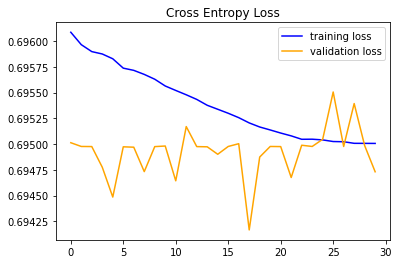

In [ ]:
#Accuracy curve
import matplotlib.pyplot as plt
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend(['training loss','validation loss'])

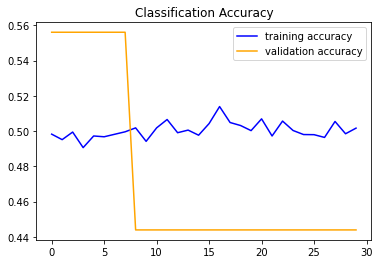

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(['training accuracy','validation accuracy'])